In [32]:
## non_smile 얼굴 만들기
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pwd

'/content/drive/My Drive'

In [34]:
cd /content/drive/MyDrive/data/non_smile

/content/drive/MyDrive/data/non_smile


Text(0.5, 1.0, 'Non_smile')

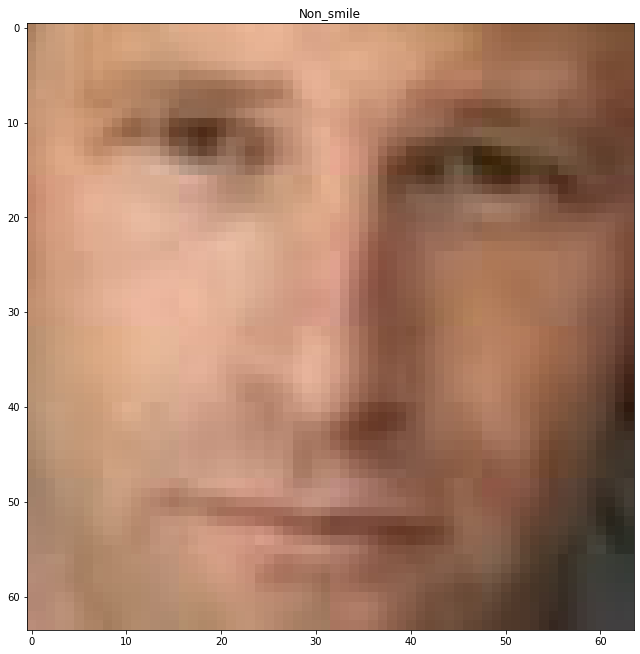

In [37]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_smile')

In [38]:
image_sample.shape

(64, 64, 3)

In [39]:
pwd


'/content/drive/MyDrive/data/non_smile'

In [40]:
cd ..

/content/drive/MyDrive/data


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='/content/drive/MyDrive/data',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째



Found 603 images belonging to 2 classes.


array([[[0.43529415, 0.34509805, 0.2901961 ],
        [0.5882353 , 0.48627454, 0.43529415],
        [0.7176471 , 0.58431375, 0.54901963],
        ...,
        [0.7607844 , 0.53333336, 0.5254902 ],
        [0.7490196 , 0.52156866, 0.5137255 ],
        [0.74509805, 0.5176471 , 0.50980395]],

       [[0.45882356, 0.37254903, 0.31764707],
        [0.6039216 , 0.5019608 , 0.45098042],
        [0.7176471 , 0.5921569 , 0.54901963],
        ...,
        [0.7725491 , 0.54509807, 0.5411765 ],
        [0.7568628 , 0.5294118 , 0.5254902 ],
        [0.7490196 , 0.52156866, 0.5176471 ]],

       [[0.4666667 , 0.3921569 , 0.33333334],
        [0.6039216 , 0.5137255 , 0.45882356],
        [0.7019608 , 0.58431375, 0.5411765 ],
        ...,
        [0.77647066, 0.5568628 , 0.5686275 ],
        [0.7568628 , 0.5372549 , 0.54901963],
        [0.74509805, 0.5254902 , 0.5294118 ]],

       ...,

       [[1.        , 0.7372549 , 0.7137255 ],
        [0.98823535, 0.73333335, 0.70980394],
        [0.9725491 , 0

In [44]:
train[0][0][0].shape

(64, 64, 3)

In [45]:
train[0][0].shape

(1, 64, 64, 3)

In [46]:
train[0][0]

array([[[[0.43529415, 0.34509805, 0.2901961 ],
         [0.5882353 , 0.48627454, 0.43529415],
         [0.7176471 , 0.58431375, 0.54901963],
         ...,
         [0.7607844 , 0.53333336, 0.5254902 ],
         [0.7490196 , 0.52156866, 0.5137255 ],
         [0.74509805, 0.5176471 , 0.50980395]],

        [[0.45882356, 0.37254903, 0.31764707],
         [0.6039216 , 0.5019608 , 0.45098042],
         [0.7176471 , 0.5921569 , 0.54901963],
         ...,
         [0.7725491 , 0.54509807, 0.5411765 ],
         [0.7568628 , 0.5294118 , 0.5254902 ],
         [0.7490196 , 0.52156866, 0.5176471 ]],

        [[0.4666667 , 0.3921569 , 0.33333334],
         [0.6039216 , 0.5137255 , 0.45882356],
         [0.7019608 , 0.58431375, 0.5411765 ],
         ...,
         [0.77647066, 0.5568628 , 0.5686275 ],
         [0.7568628 , 0.5372549 , 0.54901963],
         [0.74509805, 0.5254902 , 0.5294118 ]],

        ...,

        [[1.        , 0.7372549 , 0.7137255 ],
         [0.98823535, 0.73333335, 0.70980394]

In [47]:
type(train[0][0])

numpy.ndarray

In [48]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(600, 64, 64, 3)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 9ms/step
6000 [D loss: 0.618357, acc.: 64.84%] [G loss: 0.922937]
4/4 [==============================] - 0s 8ms/step
7000 [D loss: 0.607506, acc.: 64.84%] [G loss: 1.002897]
4/4 [==============================] - 0s 9ms/step
8000 [D loss: 0.753924, acc.: 55.47%] [G loss: 0.923498]
4/4 [==============================] - 0s 8ms/step
9000 [D loss: 0.803296, acc.: 56.64%] [G loss: 0.917767]
4/4 [==============================] - 0s 10ms/step
10000 [D loss: 0.713800, acc.: 53.91%] [G loss: 0.922211]
1/1 [==============================] - 0s 18ms/step


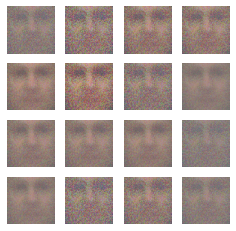

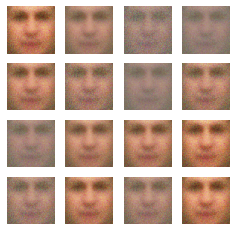

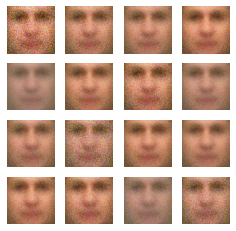

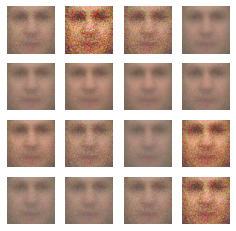

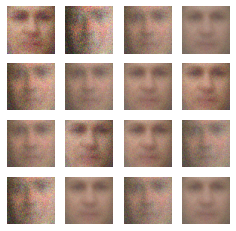

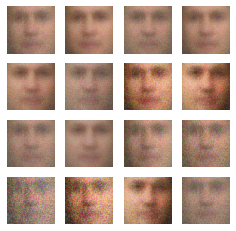

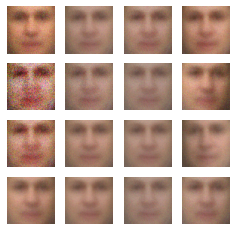

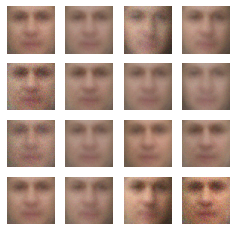

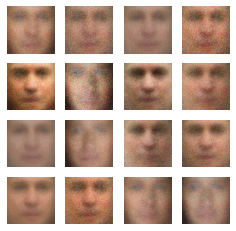

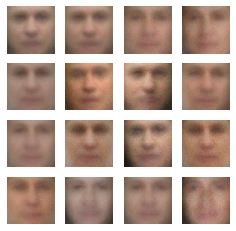

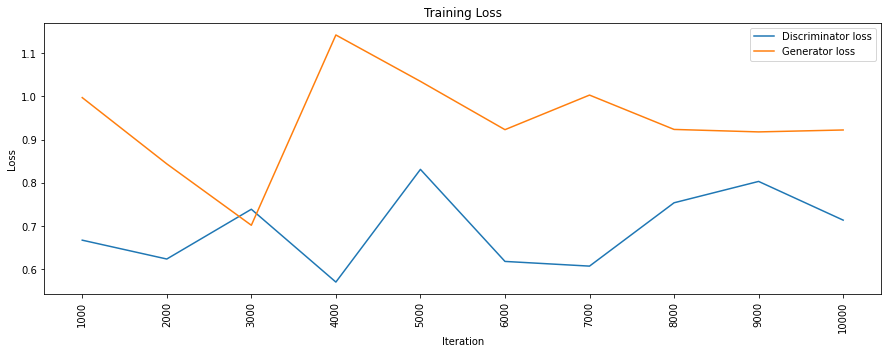

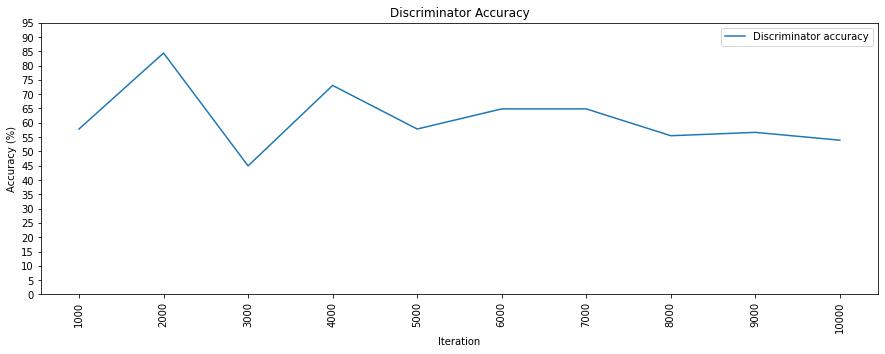

In [49]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):
    
    X_train = X_train2 
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
